In [1]:
import pandas as pd
from io import StringIO
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
#% matplotlib inline
#plt.style.use('ggplot')

In [2]:
def rsi_method_1(the_data,n=14):
    delta=the_data.Close.diff()
    delta=the_data['Close'].diff()
    
    dUp=delta[delta>0]
    dDown=delta[delta<0]
    average_gain=0
    average_loss=0
    
    print(dUp)
    
    for i in range(n,len(the_data.Close)):
        if delta[i]>0:
            dUp=delta[i]
            dDown=0
        else:
            dUp=0
            dDown=-delta[i]
        average_gain=(average_gain*(n-1)+dUp)/n
        average_loss=(average_loss*(n-1)+dDown)/n
        
    #print(average_gain)
        RS=average_gain/average_loss
        RSI[i]=100.-(100./(1.+RS))
    RSI.dropna(inplace=True)
    return RSI
    
    
    

In [3]:
def rsi_function(Close,n=14):
    deltas=np.diff(Close)
    seed=deltas[:n+1];print(seed)
    up=seed[seed>=0].sum()/n;print(up)
    down=-seed[seed<0].sum()/n;print(down)
    
    rs=up/down
    print (rs)
    rsi=np.zeros_like(Close)
    print(rsi)
    
    rsi[:n]=100.-100./(1.+rs)
    print(rsi[5:15])
    
    for i in range(n,len(Close)):
        delta=deltas[i-1]
        if delta >0:
            upval=delta
            downval=0.
        else:
            upval=0.
            downval=-delta
            
        up=(up*(n-1)+upval)/n
        down=(down*(n-1)+downval)/n
        
        rs=up/down
        rsi[i]=100.-100./(1.+rs)
    
    return rsi
        
    
    #print(seed,up,down,rs)
    

In [4]:
location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\individual_stocks_5yr\AET_data.csv'
the_data=pd.read_csv(location,parse_dates=True,index_col='Date')

In [5]:
the_rsi=rsi_function(the_data.Close)

[-0.51  0.68  0.52 -0.13  2.14 -0.28 -0.33 -0.27 -0.58  0.28 -0.47  0.59
 -0.32 -0.39 -0.26]
0.300714285714
0.252857142857
1.18926553672
[ 0.  0.  0. ...,  0.  0.  0.]
[ 54.32258065  54.32258065  54.32258065  54.32258065  54.32258065
  54.32258065  54.32258065  54.32258065  54.32258065   0.        ]


In [6]:
#method_1_rsi=rsi_method_1(the_data)

plt.figure(figsize=(15,10))
plt.grid()
plt.ylim(0,100)
plt.plot(method_1_rsi);plt.show()

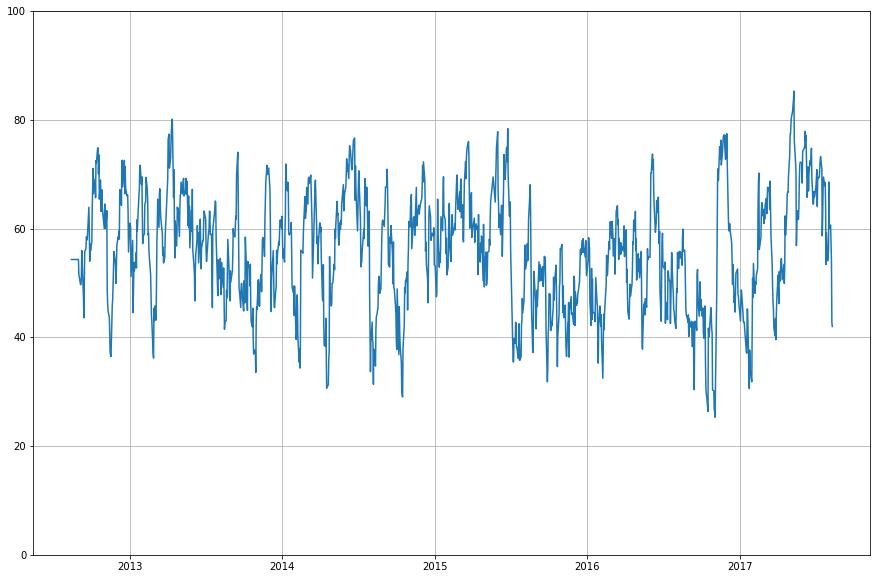

In [7]:
plt.figure(figsize=(15,10))
plt.grid()
plt.ylim(0,100)
plt.plot(the_data.index,the_rsi);plt.show()

In [8]:
the_rsi

array([ 54.32258065,  54.32258065,  54.32258065, ...,  54.20689314,
        42.80964097,  41.9971348 ])

In [9]:
the_rsi.shape

(1258,)

In [10]:
the_rsi.reshape(the_rsi.shape[0],1)

array([[ 54.32258065],
       [ 54.32258065],
       [ 54.32258065],
       ..., 
       [ 54.20689314],
       [ 42.80964097],
       [ 41.9971348 ]])

In [11]:
the_rsi=the_rsi.reshape(the_rsi.shape[0],1)
the_rsi=pd.DataFrame(the_rsi,columns=['RSI'],index=the_data.Close.index)

In [12]:
the_date='2012-09'

In [13]:
the_rsi[the_date]['RSI']

Date
2012-09-04    49.695814
2012-09-05    49.843707
2012-09-06    51.382981
2012-09-07    55.967170
2012-09-10    49.574704
2012-09-11    47.319273
2012-09-12    43.598307
2012-09-13    50.024839
2012-09-14    55.781593
2012-09-17    56.341862
2012-09-18    58.482044
2012-09-19    58.121063
2012-09-20    57.928528
2012-09-21    59.307632
2012-09-24    63.931615
2012-09-25    59.795684
2012-09-26    54.007010
2012-09-27    57.135198
2012-09-28    55.964010
Name: RSI, dtype: float64

In [14]:
location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\indicated_data\AET_indicated.csv'
the_what=pd.read_csv(location,parse_dates=True,index_col='Date')

In [15]:
the_what[the_date]['RSI']

Date
2012-09-24    66.930552
2012-09-25    62.345589
2012-09-26    55.990822
2012-09-27    59.131110
2012-09-28    57.860750
Name: RSI, dtype: float64

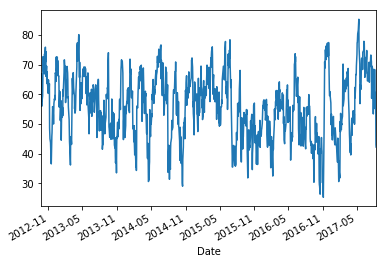

In [16]:
the_what.RSI.plot();plt.show()

In [17]:
the_data[the_date]['Close']

Date
2012-09-04    38.15
2012-09-05    38.17
2012-09-06    38.37
2012-09-07    39.00
2012-09-10    38.20
2012-09-11    37.89
2012-09-12    37.35
2012-09-13    38.17
2012-09-14    39.04
2012-09-17    39.13
2012-09-18    39.47
2012-09-19    39.43
2012-09-20    39.41
2012-09-21    39.60
2012-09-24    40.29
2012-09-25    39.90
2012-09-26    39.30
2012-09-27    39.72
2012-09-28    39.60
Name: Close, dtype: float64

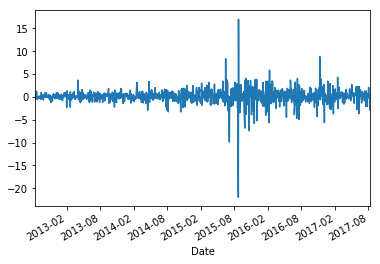

In [18]:
the_data.Low.diff().plot();plt.show()

In [19]:
the_data.Volume.pct_change()

Date
2012-08-13         NaN
2012-08-14    0.114763
2012-08-15   -0.024597
2012-08-16    0.346492
2012-08-17   -0.223490
2012-08-20    5.711261
2012-08-21   -0.577506
2012-08-22   -0.365876
2012-08-23   -0.210356
2012-08-24    0.380785
2012-08-27   -0.349250
2012-08-28   -0.104732
2012-08-29    0.140571
2012-08-30    0.088993
2012-08-31   -0.054086
2012-09-04    0.204731
2012-09-05   -0.021107
2012-09-06   -0.056485
2012-09-07    0.072431
2012-09-10    0.093305
2012-09-11    0.180612
2012-09-12   -0.105675
2012-09-13    0.647945
2012-09-14   -0.142860
2012-09-17   -0.230818
2012-09-18   -0.072294
2012-09-19    0.160445
2012-09-20   -0.445731
2012-09-21    0.799507
2012-09-24    0.153070
                ...   
2017-06-30    0.142879
2017-07-03    0.364195
2017-07-05   -0.186091
2017-07-06   -0.136631
2017-07-07   -0.086288
2017-07-10   -0.019201
2017-07-11    0.460399
2017-07-12   -0.205561
2017-07-13    0.451360
2017-07-14   -0.147332
2017-07-17    0.059610
2017-07-18    0.186204
2017-0

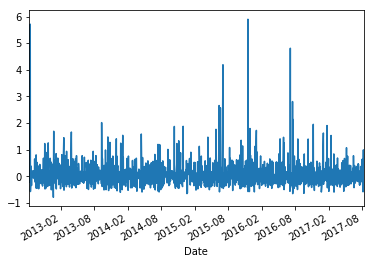

In [20]:
the_data.Volume.pct_change().plot();plt.show()

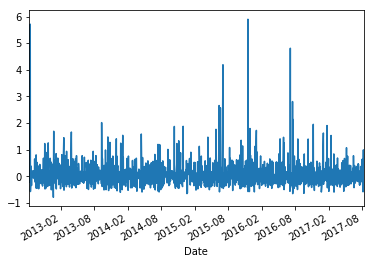

In [21]:
the_data['Volume'].pct_change().plot();plt.show()